In [1]:
import numpy as np
import pandas as pd

In [6]:
data=pd.read_csv('Advertising.csv',index_col=0)
data

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [8]:
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [10]:
data.shape

(200, 4)

In [17]:
import seaborn as sns

Text(0, 0.5, 'Sales')

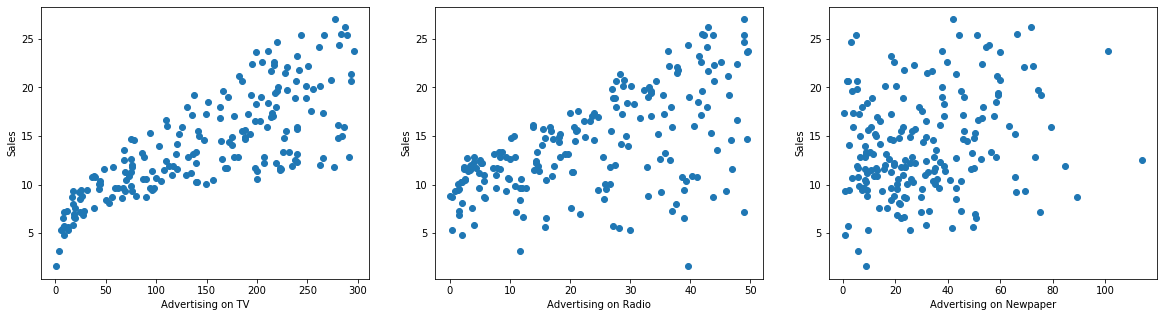

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,5))

plt.subplot(131)
plt.scatter(data['TV'],data['sales'])
plt.xlabel("Advertising on TV")
plt.ylabel("Sales")

plt.subplot(132)
plt.scatter(data['radio'],data['sales'])
plt.xlabel("Advertising on Radio")
plt.ylabel("Sales")

plt.subplot(133)
plt.scatter(data['newspaper'],data['sales'])
plt.xlabel("Advertising on Newpaper")
plt.ylabel("Sales")

In [19]:
data.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [20]:
x = data.iloc[:,:-1]
x

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4
...,...,...,...
196,38.2,3.7,13.8
197,94.2,4.9,8.1
198,177.0,9.3,6.4
199,283.6,42.0,66.2


In [21]:
y = data.iloc[:,3]
y

1      22.1
2      10.4
3       9.3
4      18.5
5      12.9
       ... 
196     7.6
197     9.7
198    12.8
199    25.5
200    13.4
Name: sales, Length: 200, dtype: float64

In [22]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y)       
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [25]:
y_pred = model.predict(x)
print(y_pred[:5])
type(y_pred)

[20.52397441 12.33785482 12.30767078 17.59782951 13.18867186]


numpy.ndarray

In [26]:
result = pd.DataFrame({'actual outcome':y,'predicted values':y_pred})
result.head()

,actual outcome,predicted values
1,22.1,20.523974
2,10.4,12.337855
3,9.3,12.307671
4,18.5,17.597830
5,12.9,13.188672


In [29]:
import numpy as np
x_test = np.array([[100,10,50]])
new = pd.DataFrame(x_test)

In [28]:
y_pred_test = model.predict(new)
print(y_pred_test)

[9.34877943]


In [30]:
type(model.coef_)

numpy.ndarray

In [31]:
model.coef_*np.array([100,10,50])

array([ 4.57646455,  1.88530017, -0.05187465])

In [32]:
sum(model.coef_*np.array([100,10,50])) + model.intercept_

9.348779432057398